In [1]:
import pandas as pandas
from matplotlib import pyplot as pyplot
import numpy as np
%matplotlib inline

In [2]:
data = pandas.read_csv('customer_churn.csv')
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3523,0378-CJKPV,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),112.10,7965.95,No
1621,6352-TWCAU,Female,0,No,No,35,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,86.45,3029.1,Yes
2717,0244-LGNFY,Female,0,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),92.65,6733,No
6560,9801-NOSHQ,Male,0,No,Yes,23,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.80,465.45,No
3219,3896-ZVNET,Female,0,Yes,Yes,24,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,24.70,571.75,No


In [3]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

drop unessential columns like customerId

In [4]:
data.drop('customerID', axis='columns', inplace=True)
data.head

<bound method NDFrame.head of       gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL         

convert TotalCharges into numeric


In [5]:
data.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

TotalCharges values are in string format

In [6]:
pandas.to_numeric(data.TotalCharges, errors='coerce').isnull

<bound method Series.isnull of 0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64>

In [7]:
data.shape

(7043, 20)

In [8]:
data[pandas.to_numeric(data.TotalCharges, errors='coerce').isnull()].shape

(11, 20)

There are 11 rows Totalcharges is null. lets drop these rows

In [9]:
data1 = data[data.TotalCharges != ' ']
data1.shape

(7032, 20)

After dropping null in TotalCharges, now can convert to numeric

In [10]:
data1.TotalCharges = pandas.to_numeric(data1.TotalCharges)

C:\Users\HP PROBOOK\AppData\Local\Temp\ipykernel_26080\481107861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.TotalCharges = pandas.to_numeric(data1.TotalCharges)


In [11]:
data1.TotalCharges.dtype

dtype('float64')

In [12]:
tenure_churn_no = data1[data1.Churn=='No'].tenure  #people who leave the company
tenure_churn_yes = data1[data1.Churn=='Yes'].tenure

(array([[ 847.,  476.,  402.,  424.,  371.,  346.,  380.,  425.,  455.,
         1037.],
        [ 877.,  259.,  159.,  114.,  102.,   98.,   72.,   70.,   46.,
           72.]]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <a list of 2 BarContainer objects>)

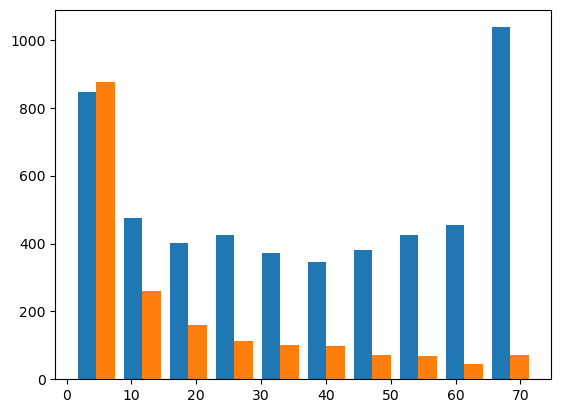

In [13]:
pyplot.hist([tenure_churn_no, tenure_churn_yes])

Get categorical columns. and skip numarical columns

In [14]:

for column in data1:
     if data1[column].dtype == "object":
       print(f"{column}    {data1[column].unique()}" )

gender    ['Female' 'Male']
Partner    ['Yes' 'No']
Dependents    ['No' 'Yes']
PhoneService    ['No' 'Yes']
MultipleLines    ['No phone service' 'No' 'Yes']
InternetService    ['DSL' 'Fiber optic' 'No']
OnlineSecurity    ['No' 'Yes' 'No internet service']
OnlineBackup    ['Yes' 'No' 'No internet service']
DeviceProtection    ['No' 'Yes' 'No internet service']
TechSupport    ['No' 'Yes' 'No internet service']
StreamingTV    ['No' 'Yes' 'No internet service']
StreamingMovies    ['No' 'Yes' 'No internet service']
Contract    ['Month-to-month' 'One year' 'Two year']
PaperlessBilling    ['Yes' 'No']
PaymentMethod    ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn    ['No' 'Yes']


['No' 'Yes' 'No internet service']  here No internet service is similar to the No. then replace it as No

In [15]:
data1.replace("No internet service", "No", inplace=True)
data1.replace("No phone service", "No", inplace=True)

C:\Users\HP PROBOOK\AppData\Local\Temp\ipykernel_26080\1363846761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.replace("No internet service", "No", inplace=True)
C:\Users\HP PROBOOK\AppData\Local\Temp\ipykernel_26080\1363846761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.replace("No phone service", "No", inplace=True)


In [16]:

for column in data1:
     if data1[column].dtype == "object":
       print(f"{column}    {data1[column].unique()}" )
       

gender    ['Female' 'Male']
Partner    ['Yes' 'No']
Dependents    ['No' 'Yes']
PhoneService    ['No' 'Yes']
MultipleLines    ['No' 'Yes']
InternetService    ['DSL' 'Fiber optic' 'No']
OnlineSecurity    ['No' 'Yes']
OnlineBackup    ['Yes' 'No']
DeviceProtection    ['No' 'Yes']
TechSupport    ['No' 'Yes']
StreamingTV    ['No' 'Yes']
StreamingMovies    ['No' 'Yes']
Contract    ['Month-to-month' 'One year' 'Two year']
PaperlessBilling    ['Yes' 'No']
PaymentMethod    ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn    ['No' 'Yes']


Labelencoding 
Machine learning cant understand categorical values. then we need to convert it as numerical


In [17]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for column in yes_no_columns:
    data1[column].replace({"No": 0, "Yes":1}, inplace=True)

C:\Users\HP PROBOOK\AppData\Local\Temp\ipykernel_26080\3068950350.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1[column].replace({"No": 0, "Yes":1}, inplace=True)
C:\Users\HP PROBOOK\AppData\Local\Temp\ipykernel_26080\3068950350.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data1[co

In [18]:
for column in data1:
    
       print(f"{column}    {data1[column].unique()}" )
       

gender    ['Female' 'Male']
SeniorCitizen    [0 1]
Partner    [1 0]
Dependents    [0 1]
tenure    [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService    [0 1]
MultipleLines    [0 1]
InternetService    ['DSL' 'Fiber optic' 'No']
OnlineSecurity    [0 1]
OnlineBackup    [1 0]
DeviceProtection    [0 1]
TechSupport    [0 1]
StreamingTV    [0 1]
StreamingMovies    [0 1]
Contract    ['Month-to-month' 'One year' 'Two year']
PaperlessBilling    [1 0]
PaymentMethod    ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges    [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges    [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn    [0 1]


In [19]:
data1['gender'].replace({"Female": 1, "Male":0}, inplace=True)

C:\Users\HP PROBOOK\AppData\Local\Temp\ipykernel_26080\3275411073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1['gender'].replace({"Female": 1, "Male":0}, inplace=True)
C:\Users\HP PROBOOK\AppData\Local\Temp\ipykernel_26080\3275411073.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d

In [20]:
data1['gender'].unique

<bound method Series.unique of 0       1
1       0
2       0
3       0
4       1
       ..
7038    0
7039    1
7040    1
7041    0
7042    0
Name: gender, Length: 7032, dtype: int64>

In [21]:
data2 = pandas.get_dummies(data1, columns=['InternetService', 'PaymentMethod', 'Contract'])

In [22]:
data2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

scale MonthlyCharges, TotalCharges and tenure
these columns not in o,1. so we need to scale those columns

In [23]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
data2[cols_to_scale] = scaler.fit_transform(data2[cols_to_scale])

In [24]:
data2.sample

<bound method NDFrame.sample of       gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0          1              0        1           0  0.000000             0   
1          0              0        0           0  0.464789             1   
2          0              0        0           0  0.014085             1   
3          0              0        0           0  0.619718             0   
4          1              0        0           0  0.014085             1   
...      ...            ...      ...         ...       ...           ...   
7038       0              0        1           1  0.323944             1   
7039       1              0        1           1  1.000000             1   
7040       1              0        1           1  0.140845             0   
7041       0              1        1           0  0.042254             1   
7042       0              0        0           0  0.915493             1   

      MultipleLines  OnlineSecurity  OnlineBackup  Devi

Identify X and y columns


In [25]:
x = data2.drop('Churn', axis='columns')
y = data2['Churn']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [27]:
len(X_train.columns)

26

In [28]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),     
])

model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

d:\Anaconda\envs\ds_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7150 - loss: 0.5478
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7987 - loss: 0.4353
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8048 - loss: 0.4202
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8010 - loss: 0.4188
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7920 - loss: 0.4268
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8093 - loss: 0.4109
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8018 - loss: 0.4171
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8123 - loss: 0.4007
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8053 - loss: 0.4116
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8125 - loss: 0.3999
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8086 - loss: 0.4118
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━

In [29]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7843 - loss: 0.4406 


[0.4493982493877411, 0.7810945510864258]

In [31]:
yp = model.predict(X_test)
yp[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[0.31747475],
       [0.40506095],
       [0.00932997],
       [0.7650689 ],
       [0.40701967]], dtype=float32)

In [32]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [33]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)    

In [34]:
y_pred[:5]

[0, 0, 0, 1, 0]

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       999
           1       0.67      0.48      0.56       408

    accuracy                           0.78      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.77      0.78      0.77      1407



Confusion Matrics
Anything not in diagonal all the numbers are errors

Text(95.72222222222221, 0.5, 'Truth')

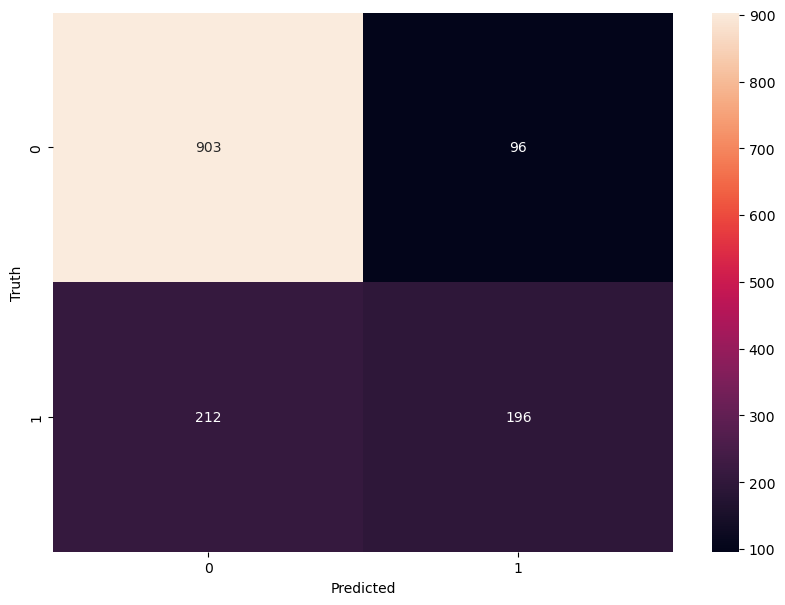

In [36]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

pyplot.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
pyplot.xlabel("Predicted")
pyplot.ylabel("Truth")


Accuracy

In [37]:
round((903+196)/(903+96+212+196), 2)

0.78

Precision for 0 class. Precision for customers who did not churn

In [38]:
round(903/(903+196), 2)

0.82

Precision for 1 class. Precision for customers who actually churn

In [39]:
round(196/(196+96), 2)

0.67